In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

#這一行表示不希望看到警告訊息
warnings.filterwarnings(action='ignore')

In [7]:
data=pd.read_csv("bodyPerformance.csv")

In [8]:
print("資料筆數:",len(data))
print("欄位數量",len(data.columns))

資料筆數: 13393
欄位數量 12


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [10]:
#檢視所有欄位的敘述型統計

data.describe(include='all')

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
count,13393.000000,13393,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
freq,NaN,8467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3349
mean,36.775106,NaN,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627,NaN
std,13.625639,NaN,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000,NaN
min,21.000000,NaN,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000,NaN
25%,25.000000,NaN,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000,NaN
50%,32.000000,NaN,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000,NaN
75%,48.000000,NaN,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000,NaN


In [12]:
data.head(10)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
5,36.0,F,165.4,55.40,22.0,64.0,119.0,23.8,21.0,27.0,153.0,B
6,42.0,F,164.5,63.70,32.2,72.0,135.0,22.7,0.8,18.0,146.0,D
7,33.0,M,174.9,77.20,36.9,84.0,137.0,45.9,12.3,42.0,234.0,B
8,54.0,M,166.8,67.50,27.6,85.0,165.0,40.4,18.6,34.0,148.0,C
9,28.0,M,185.0,84.60,14.4,81.0,156.0,57.9,12.1,55.0,213.0,B


In [13]:
for i in enumerate(data.columns):
    print('順序:{}, 每個欄位的獨立值 in "{}":\n'.format(i[0]+1,i[1]),data[i[1]].unique())

順序:1, 每個欄位的獨立值 in "age":
 [27. 25. 31. 32. 28. 36. 42. 33. 54. 57. 22. 24. 45. 26. 21. 59. 38. 44.
 23. 62. 47. 48. 50. 30. 49. 40. 52. 39. 34. 58. 43. 56. 37. 63. 35. 60.
 51. 41. 46. 29. 61. 55. 64. 53.]
順序:2, 每個欄位的獨立值 in "gender":
 ['M' 'F']
順序:3, 每個欄位的獨立值 in "height_cm":
 [172.3 165.  179.6 174.5 173.8 165.4 164.5 174.9 166.8 185.  169.2 153.
 156.  175.7 181.  159.  164.2 179.9 162.7 161.7 155.9 166.7 170.  164.1
 169.  158.3 175.8 176.  159.8 170.9 176.7 159.5 172.1 151.5 177.6 172.5
 177.5 178.  168.  173.6 173.3 159.6 161.8 169.9 183.6 180.1 169.8 157.2
 168.3 164.4 146.5 174.1 185.4 168.9 175.3 164.  162.4 166.6 174.2 150.5
 160.2 179.  172.7 171.5 175.1 172.2 171.9 174.  158.1 170.4 158.6 168.5
 156.3 157.  161.3 177.  171.  178.4 156.7 178.5 171.2 176.4 175.4 158.4
 173.  159.1 180.5 162.2 168.8 170.3 172.8 163.6 166.2 179.2 177.8 184.7
 173.2 164.3 169.1 183.5 156.9 178.2 177.9 184.8 164.7 178.3 160.1 167.7
 165.1 160.3 153.2 169.5 180.2 180.3 167.9 165.6 184.1 166.9 175.  

In [16]:
numeric=[]

for i in data.columns:
    if data[i].dtype=='float64':
        numeric.append(i)

In [17]:
#接下來處理類別欄位，且排除掉我們的數值型欄位

categoricals=[]

for col in data.columns:
    if not col in numeric:
        categoricals.append(col)
categoricals.remove('class')

In [18]:
#看看類別欄位

categoricals

['gender']

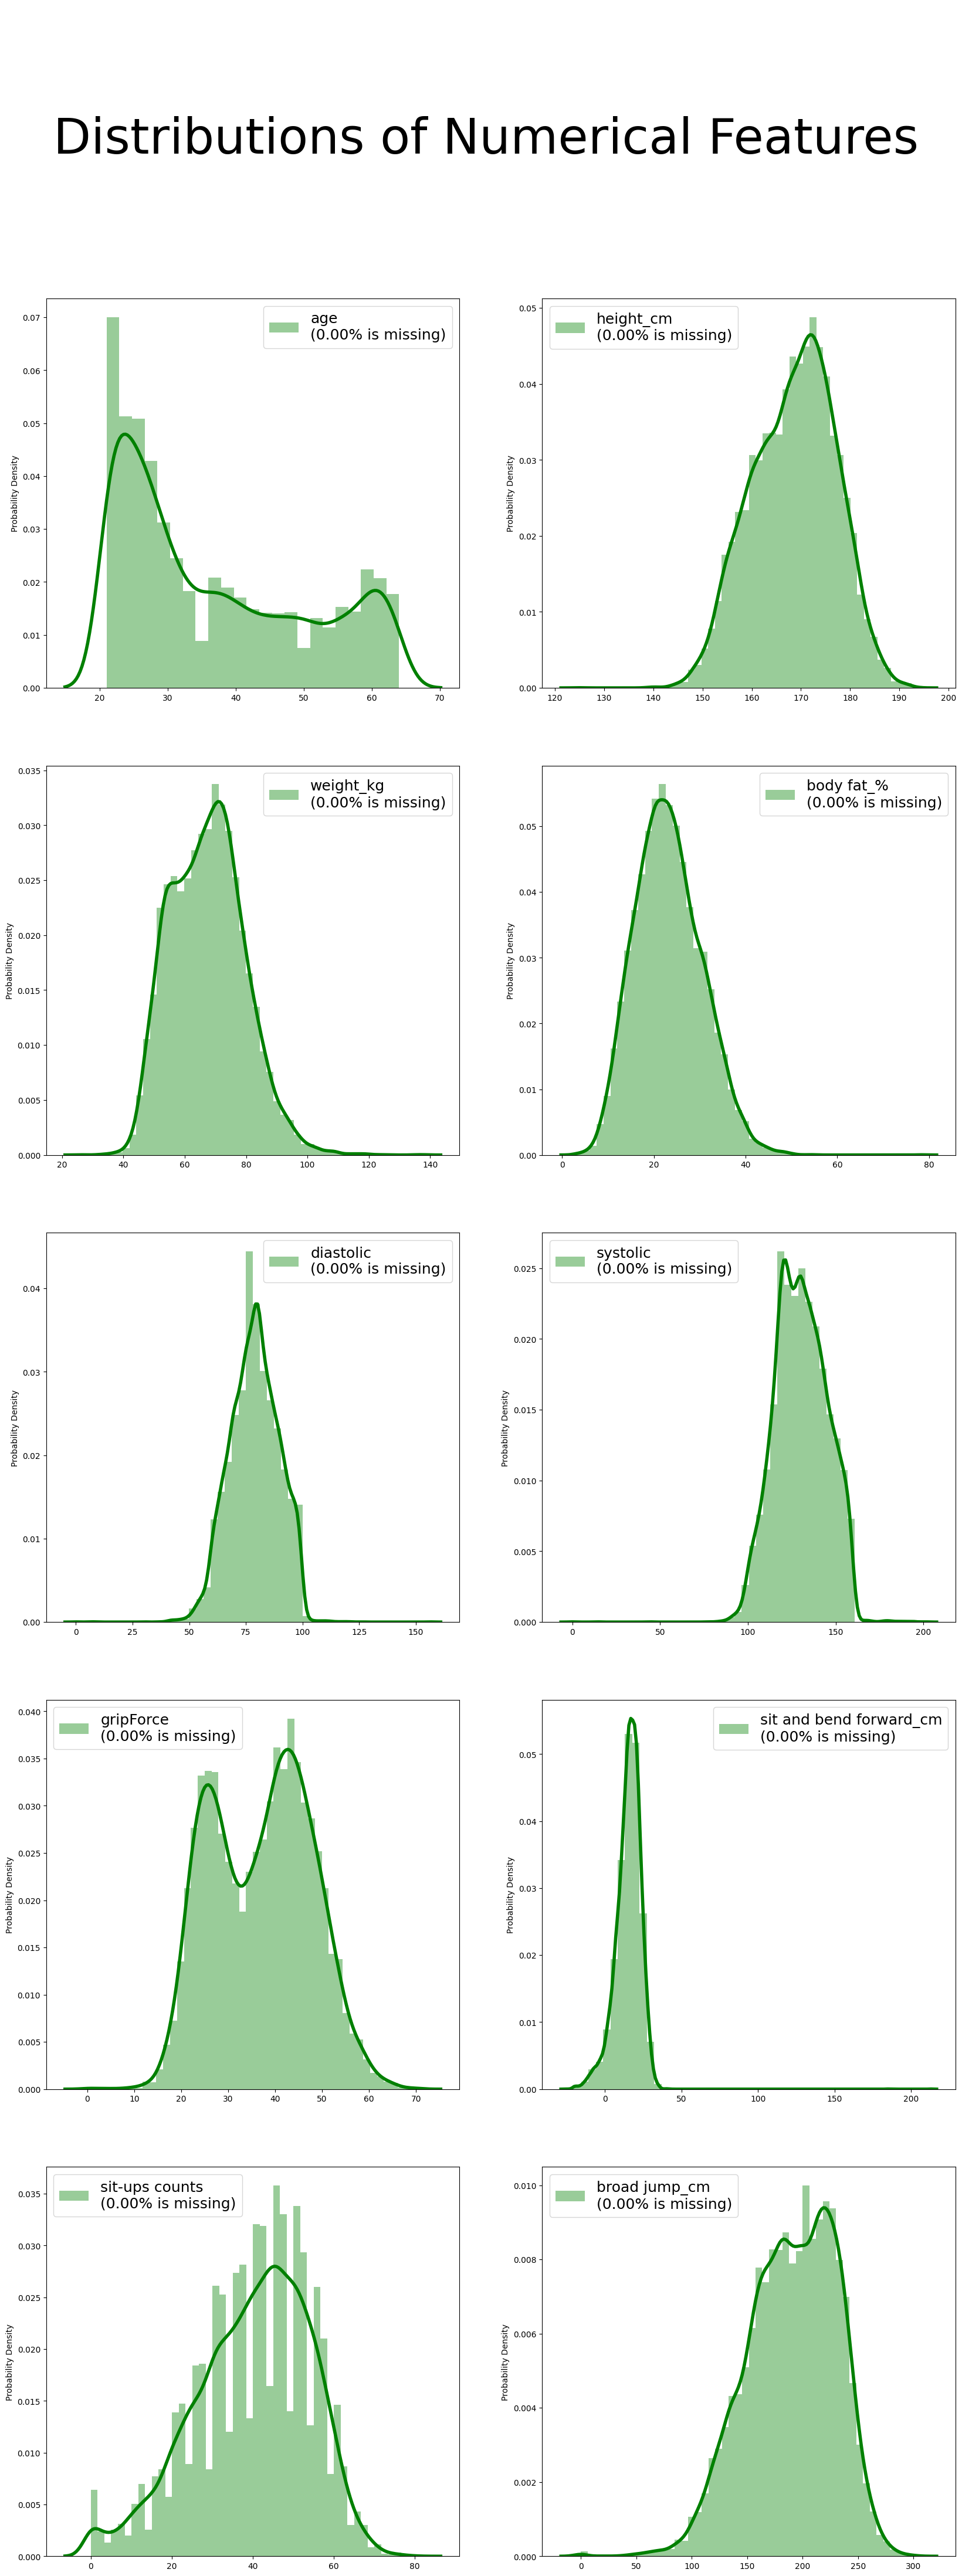

In [20]:
#一覽表視覺化，繪製 (7x2) 的圖表
#數值型欄位

#7x2的圖表
n_rows, n_cols = (5,2)

#每一張圖表大小為20x50
figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 50))

#給予這張一覽表名稱
figure.suptitle('\n\nDistributions of Numerical Features', fontsize=60)

#走訪每一個數值型欄位
#陣列變為 index, column走訪方式，要透過enumerate
for index, column in enumerate(numeric):
    
    #index由0開始
    #例如: 5//2為2(商數)，5%2為1(餘數)
    i,j = (index // n_cols), (index % n_cols)
    
    #計算該欄位去除空值的數量除以該欄位總數量的百分比
    miss_perc="%.2f"%(100*(1-(data[column].dropna().shape[0])/data.shape[0]))
    
    #文字敘述該欄位遺缺值的百分比
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    #透過seaborn的distplot針對該欄位畫圖
    #需增加常態分佈的線條
    fig=sns.distplot(data[column], color="g", label=collabel, norm_hist=True,
    
    #指派圖形位置，KDE線條寬度為4
    ax=axes[i,j], kde_kws={"lw":4})
    
    #在圖片中顯示文字說明
    #顯示的位置由程式自行判斷 (loc為best)
    fig=fig.legend(loc='best', fontsize=18)
    
    #定義每張圖的y軸說明文字
    axes[i,j].set_ylabel("Probability Density",fontsize='medium')
    
    #定義每張圖x軸說明文字為無
    axes[i,j].set_xlabel(None)

plt.show()

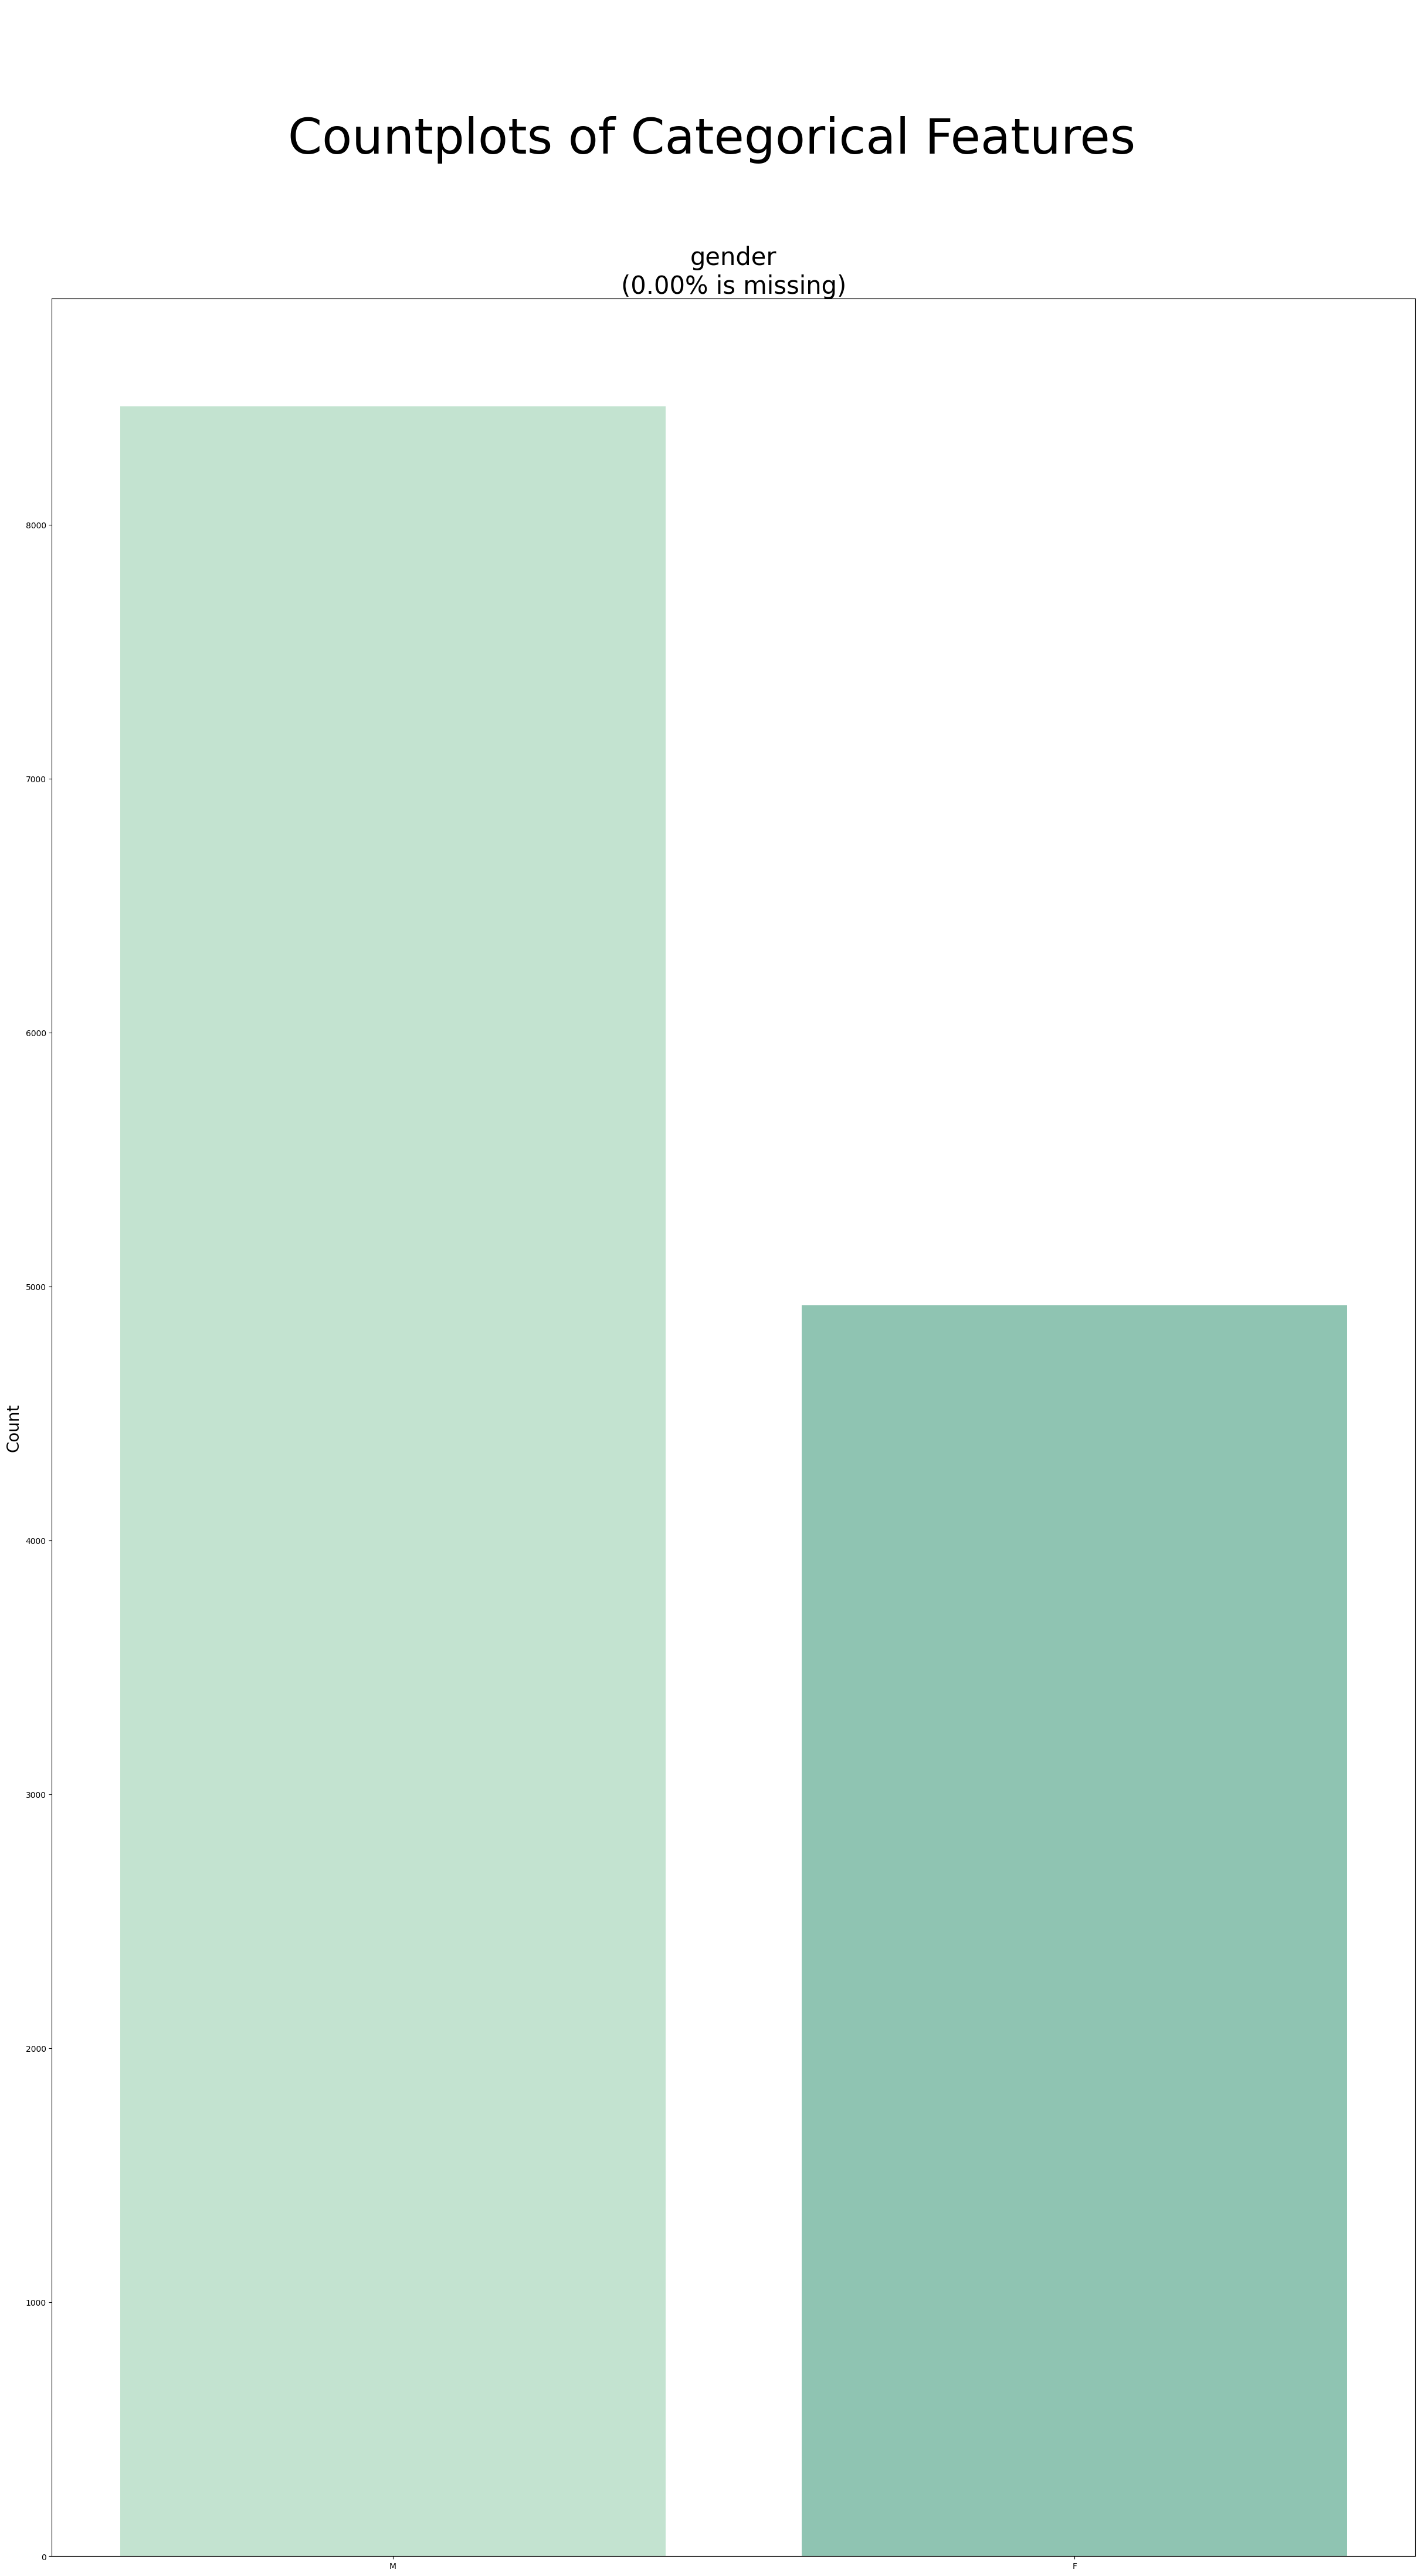

In [30]:
#類別型欄位

n_rows, n_cols = (1,1)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(30, 50))
figure.suptitle('\n\nCountplots of Categorical Features', fontsize=60)

for index, column in enumerate(categoricals):
    
    #i,j = index // n_cols, index % n_cols
    
    miss_perc="%.2f"%(100*(1-(data[column].dropna().shape[0])/data.shape[0]))
    
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    fig = sns.countplot(x=column, data=data,label=collabel, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1),
    
    ax=axes)
    
    fig .set_title(collabel,fontsize=30)
    
    fig .set_xlabel(None)
    
    fig .set_ylabel("Count",fontsize=20)
    
    #fig .set_xticklabels(axes[i,j].get_xticklabels(), fontsize='medium')

plt.show()

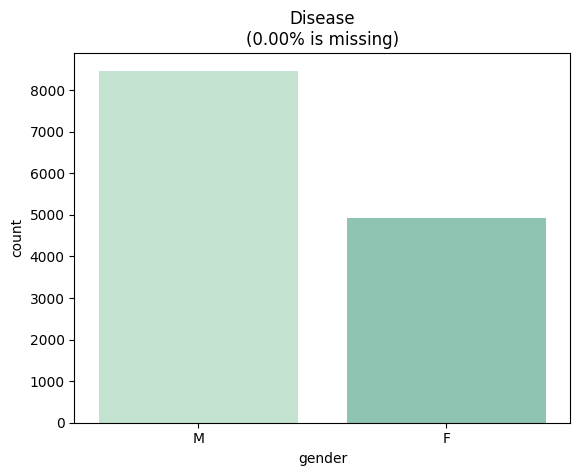

In [31]:
#應變數

miss_perc="%.2f"%(100*(1-(data['gender'].dropna().shape[0])/data.shape[0]))
    
label="Disease\n(missing:\n{}%)".format(miss_perc)

fig=sns.countplot(x=data['gender'],label=label, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1))
plt.title("Disease\n({}% is missing)".format(miss_perc))
plt.show()

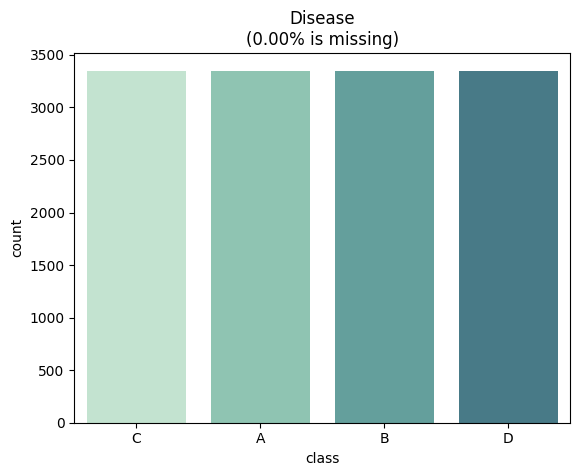

In [32]:
#應變數

miss_perc="%.2f"%(100*(1-(data['class'].dropna().shape[0])/data.shape[0]))
    
label="Disease\n(missing:\n{}%)".format(miss_perc)

fig=sns.countplot(x=data['class'],label=label, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1))
plt.title("Disease\n({}% is missing)".format(miss_perc))
plt.show()

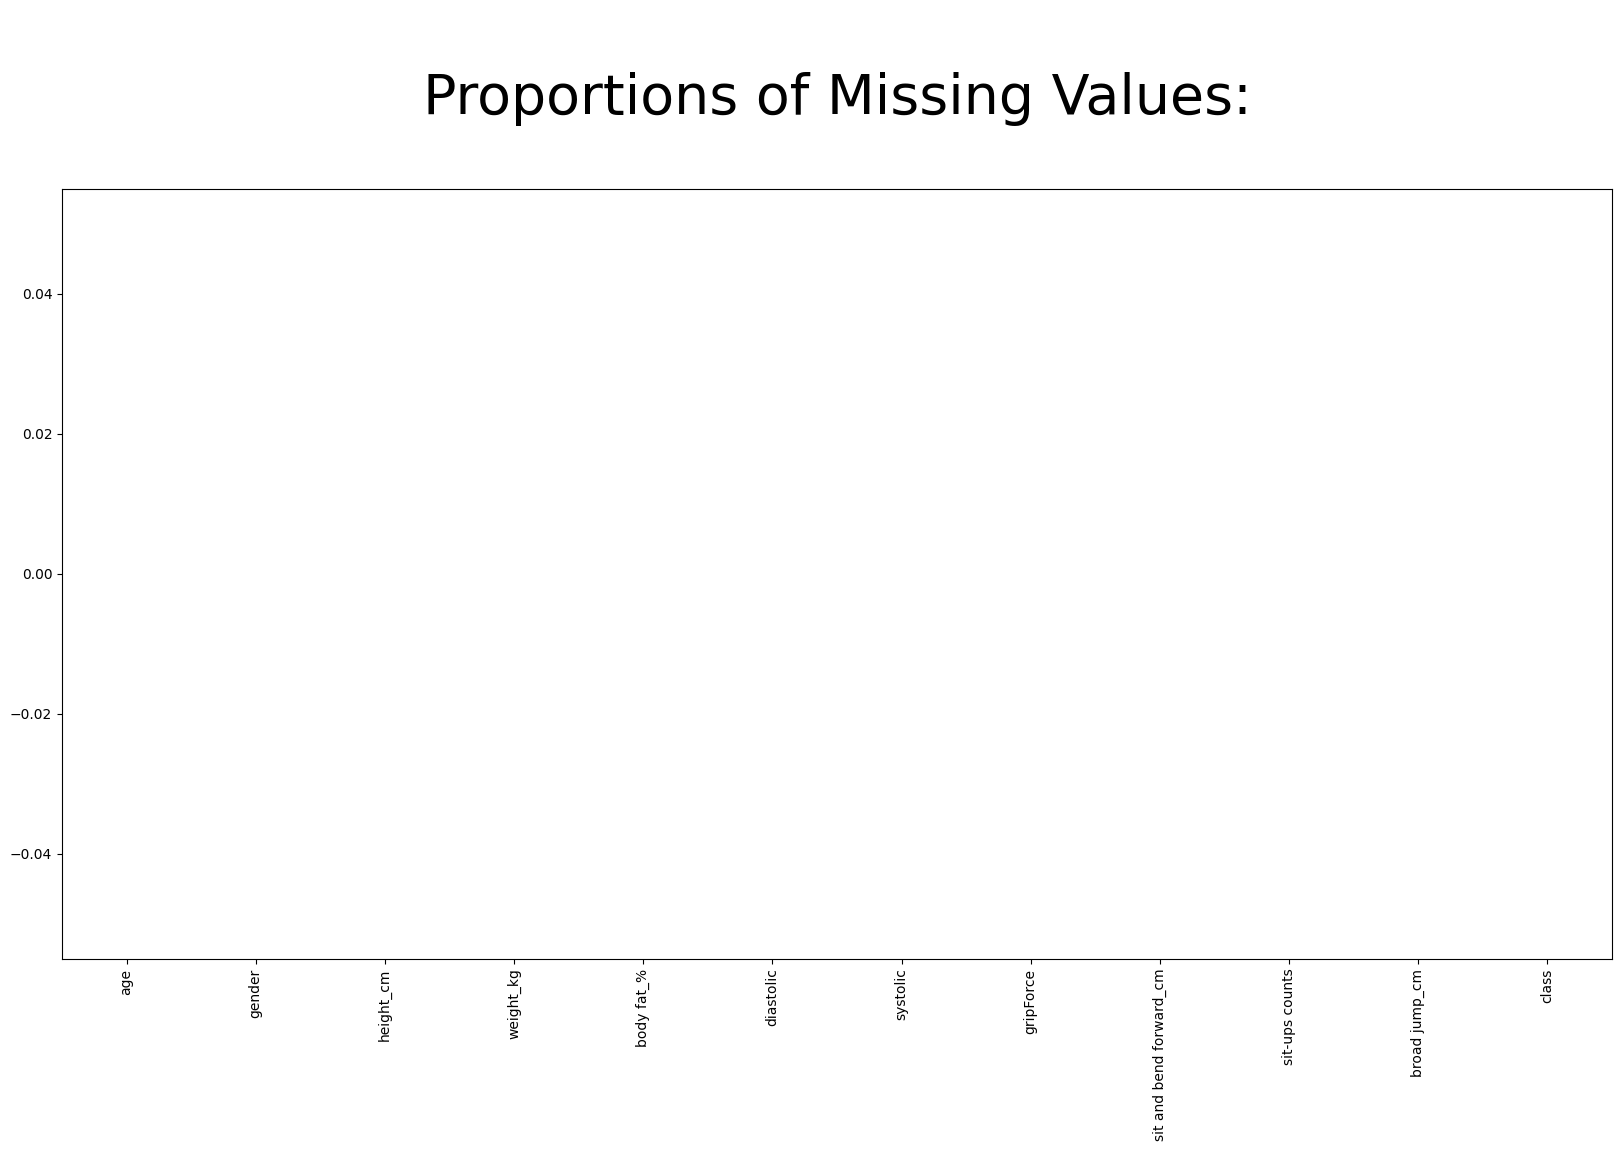

In [33]:
#展示遺缺值的比率
d=((data.isnull().sum()/data.shape[0])).sort_values(ascending=False)
#畫一張圖，大小為20x10
d.plot(kind='bar', figsize=(20,10))
plt.title("\nProportions of Missing Values:\n",fontsize=40)
plt.show()

In [44]:
#進行 dummy-variable (僅針對類別型欄位)
#欄位名稱會改變
dummydata=pd.get_dummies(data,drop_first=False,prefix_sep=': ')

dummydata.head()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,gender: F,gender: M,class: A,class: B,class: C,class: D
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,0,1,0,0,1,0
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0,1,1,0,0,0
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,0,1,0,0,1,0
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,0,1,0,1,0,0
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,0,1,0,1,0,0


#查看欄位名稱
dummydata.info()

資料視覺化

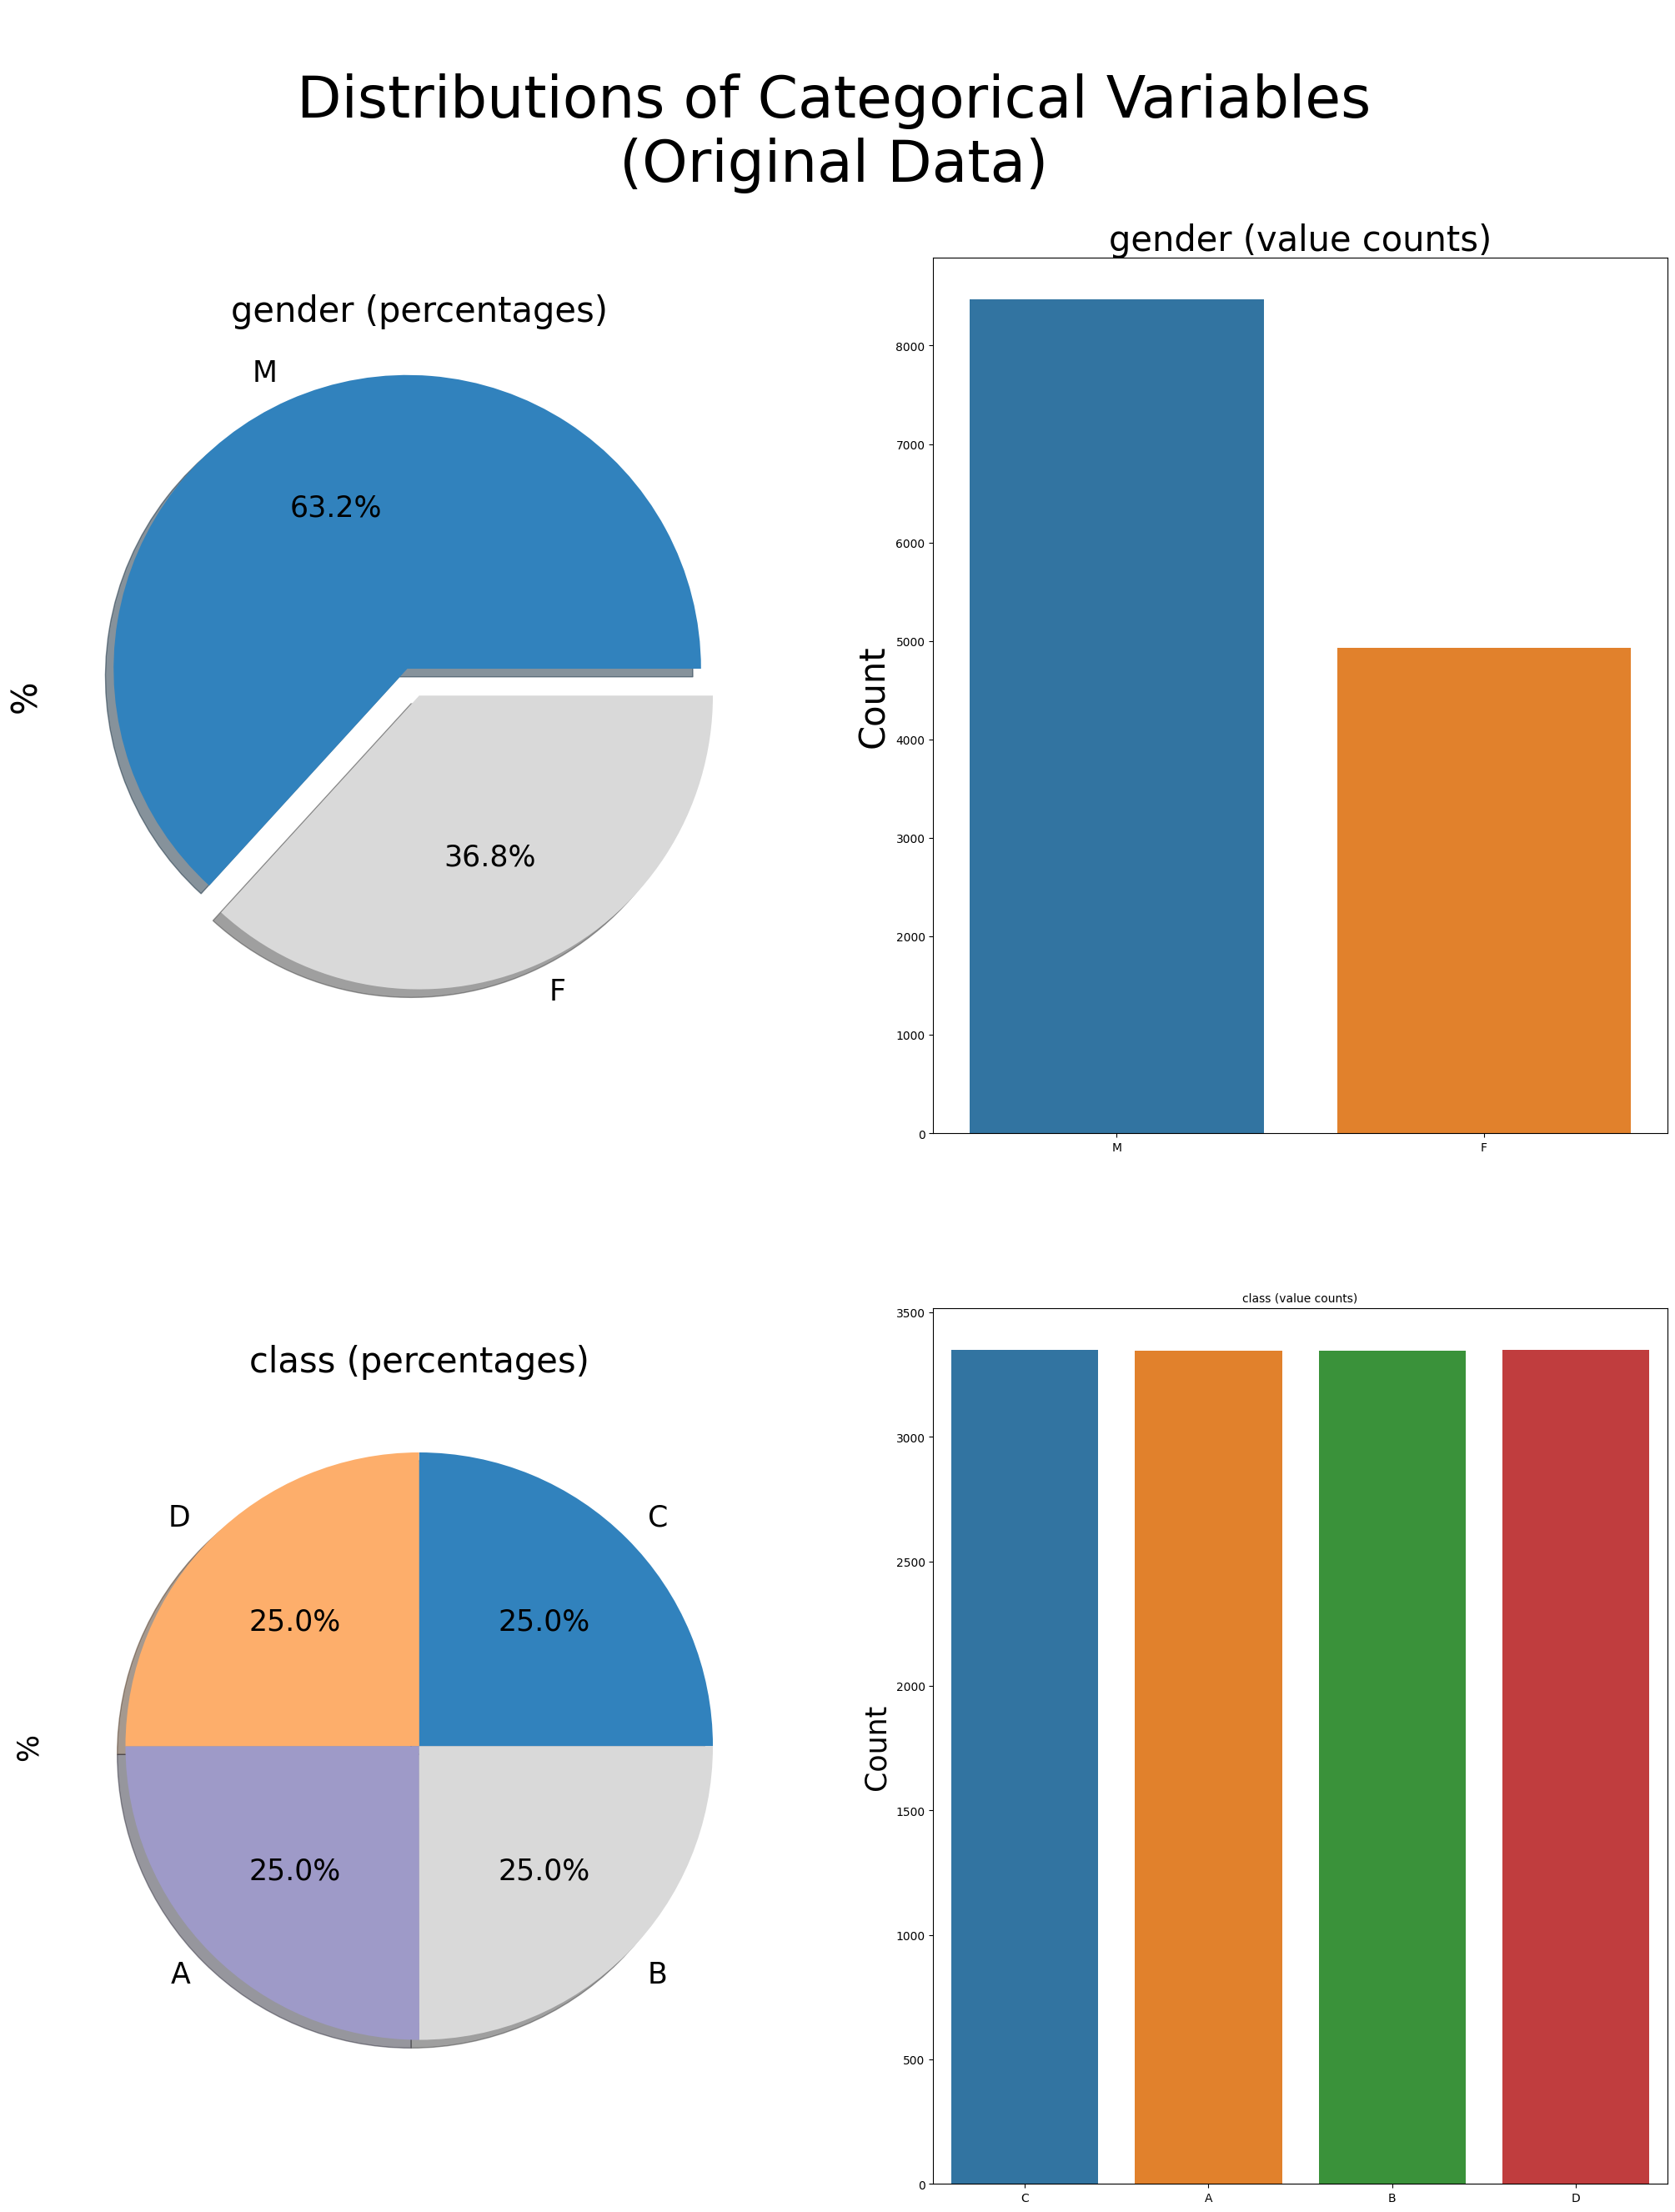

In [72]:
#塞值後觀察各欄位分布 (類別型欄位)

n_rows, n_cols = (2,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(25, 30))
figure.suptitle('\nDistributions of Categorical Variables\n(Original Data)', fontsize=50)
#針對每一個類別型欄位
for i in range(len(categoricals)):
    column=categoricals[i]
    #畫圓餅圖
    graph1=data[column].value_counts().plot.pie(autopct='%1.1f%%',
                                                ax=axes[i,0],
                                                colormap="tab20c",
                                                fontsize=25,
                                                shadow=True,
                                                explode=[0.1,0])
    #設定圓餅圖顯示資訊
    axes[i,0].set_ylabel('%',fontsize=30)
    axes[i,0].set_title(column+' (percentages)', fontsize=30)
    
    #顯示長條圖(bar-chart)
    graph2=sns.countplot(x=column,
                         data=data,
                         ax=axes[i,1])
    #設定長條圖顯示資訊
    axes[i,1].set_xlabel(None)
    axes[i,1].set_ylabel('Count',fontsize=30)
    axes[i,1].set_xticklabels(axes[i,1].get_xticklabels())
    axes[i,1].set_title(column+' (value counts)', fontsize=30)
    #針對應變數欄位(Chronic Kidney Disease)進行圓餅圖
    graph1=data['class'].value_counts().plot.pie(autopct='%1.1f%%',
                                                                  ax=axes[1,0],
                                                                  colormap='tab20c',
                                                                  fontsize=25,
                                                                  shadow=True
                                                                  )
    axes[1,0].set_ylabel("%",fontsize=25)
    axes[1,0].set_title('class (percentages)',fontsize=30)


    graph2=sns.countplot(x='class',
                         data=data,
                         ax=axes[1,1])
    axes[1,1].set_xlabel(None,fontsize=25)
    axes[1,1].set_ylabel("Count",fontsize=25)
    axes[1,1].set_xticklabels(axes[1,1].get_xticklabels())
    axes[1,1].set_title('class (value counts)', fontsize='medium')
plt.show()

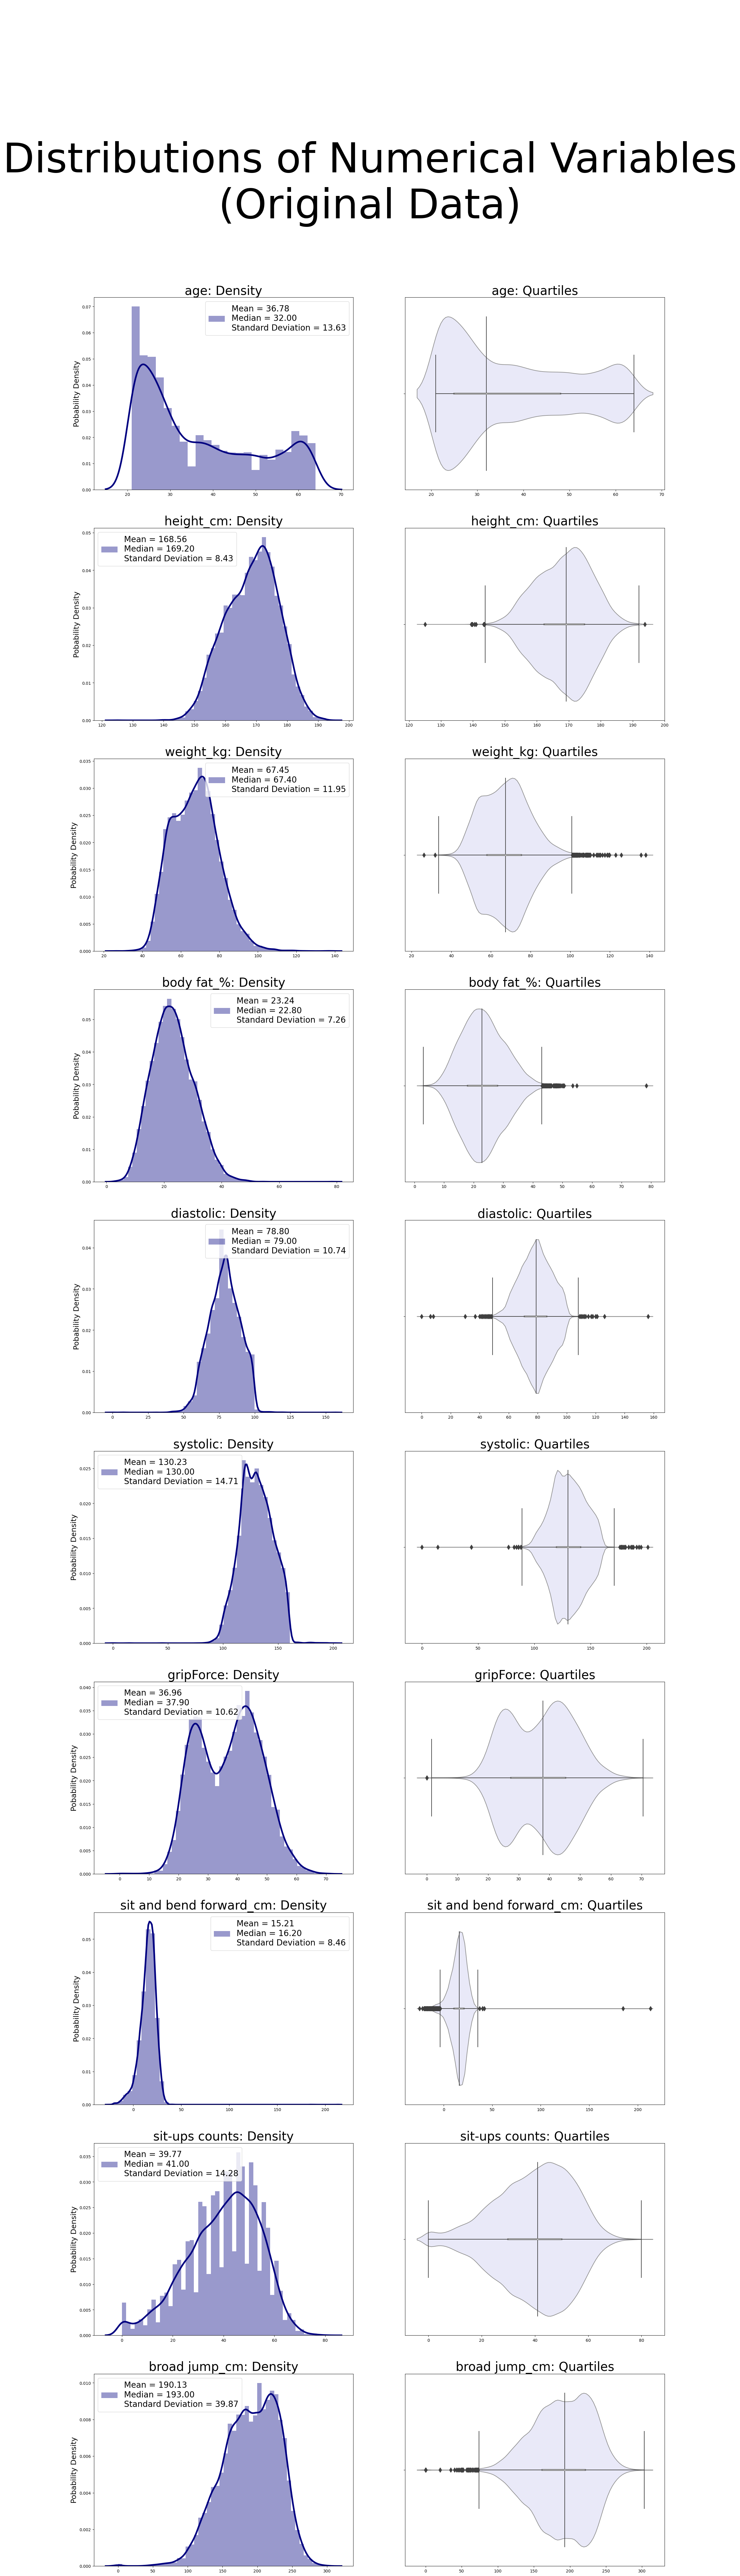

In [74]:
#塞值後觀察各欄位分布 (數值型欄位)

n_rows, n_cols = (10,2)

#圖表大小
figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(25, 100))
figure.suptitle('\n\n\nDistributions of Numerical Variables\n(Original Data)', fontsize=100)

#走訪每一個欄位
for i in range(len(numeric)):
    
    #處理的欄位
    col=numeric[i]
    
    #每個圖表都要顯示平均值、中位數、標準差
    label='Mean = {}\nMedian = {}\nStandard Deviation = {}'.format("%.2f"%data[col].mean(),
                                                                   "%.2f"%data[col].median(),
                                                                   "%.2f"%data[col].std())
    #繪製distplot圖表
    graph1=sns.distplot(data[col],
                        color="navy",
                        ax=axes[i,0],
                        kde_kws={"lw":4},
                        norm_hist=True,
                        label=label).legend(loc='best',fontsize=20)
    axes[i,0].set_title(col+': Density',fontsize=30)
    axes[i,0].set_xlabel(None)
    axes[i,0].set_ylabel("Pobability Density",fontsize=18)

    #繪製小提琴圖
    graph20=sns.violinplot(x=col,
                          data=data,
                          ax=axes[i,1],
                          color='lavender',
                          inner='box')
    #將小提琴圖內的線條補上 (25%, 50% 75% 與 IQR 與 outlier)
    graph21=sns.boxplot(x=col,
                        data=data,
                        ax=axes[i,1],
                        fliersize=8,
                        boxprops=dict(alpha=0))
    
    axes[i,1].set_xlabel(None)
    axes[i,1].set_title(col+': Quartiles',fontsize=30)
    
    
plt.show()

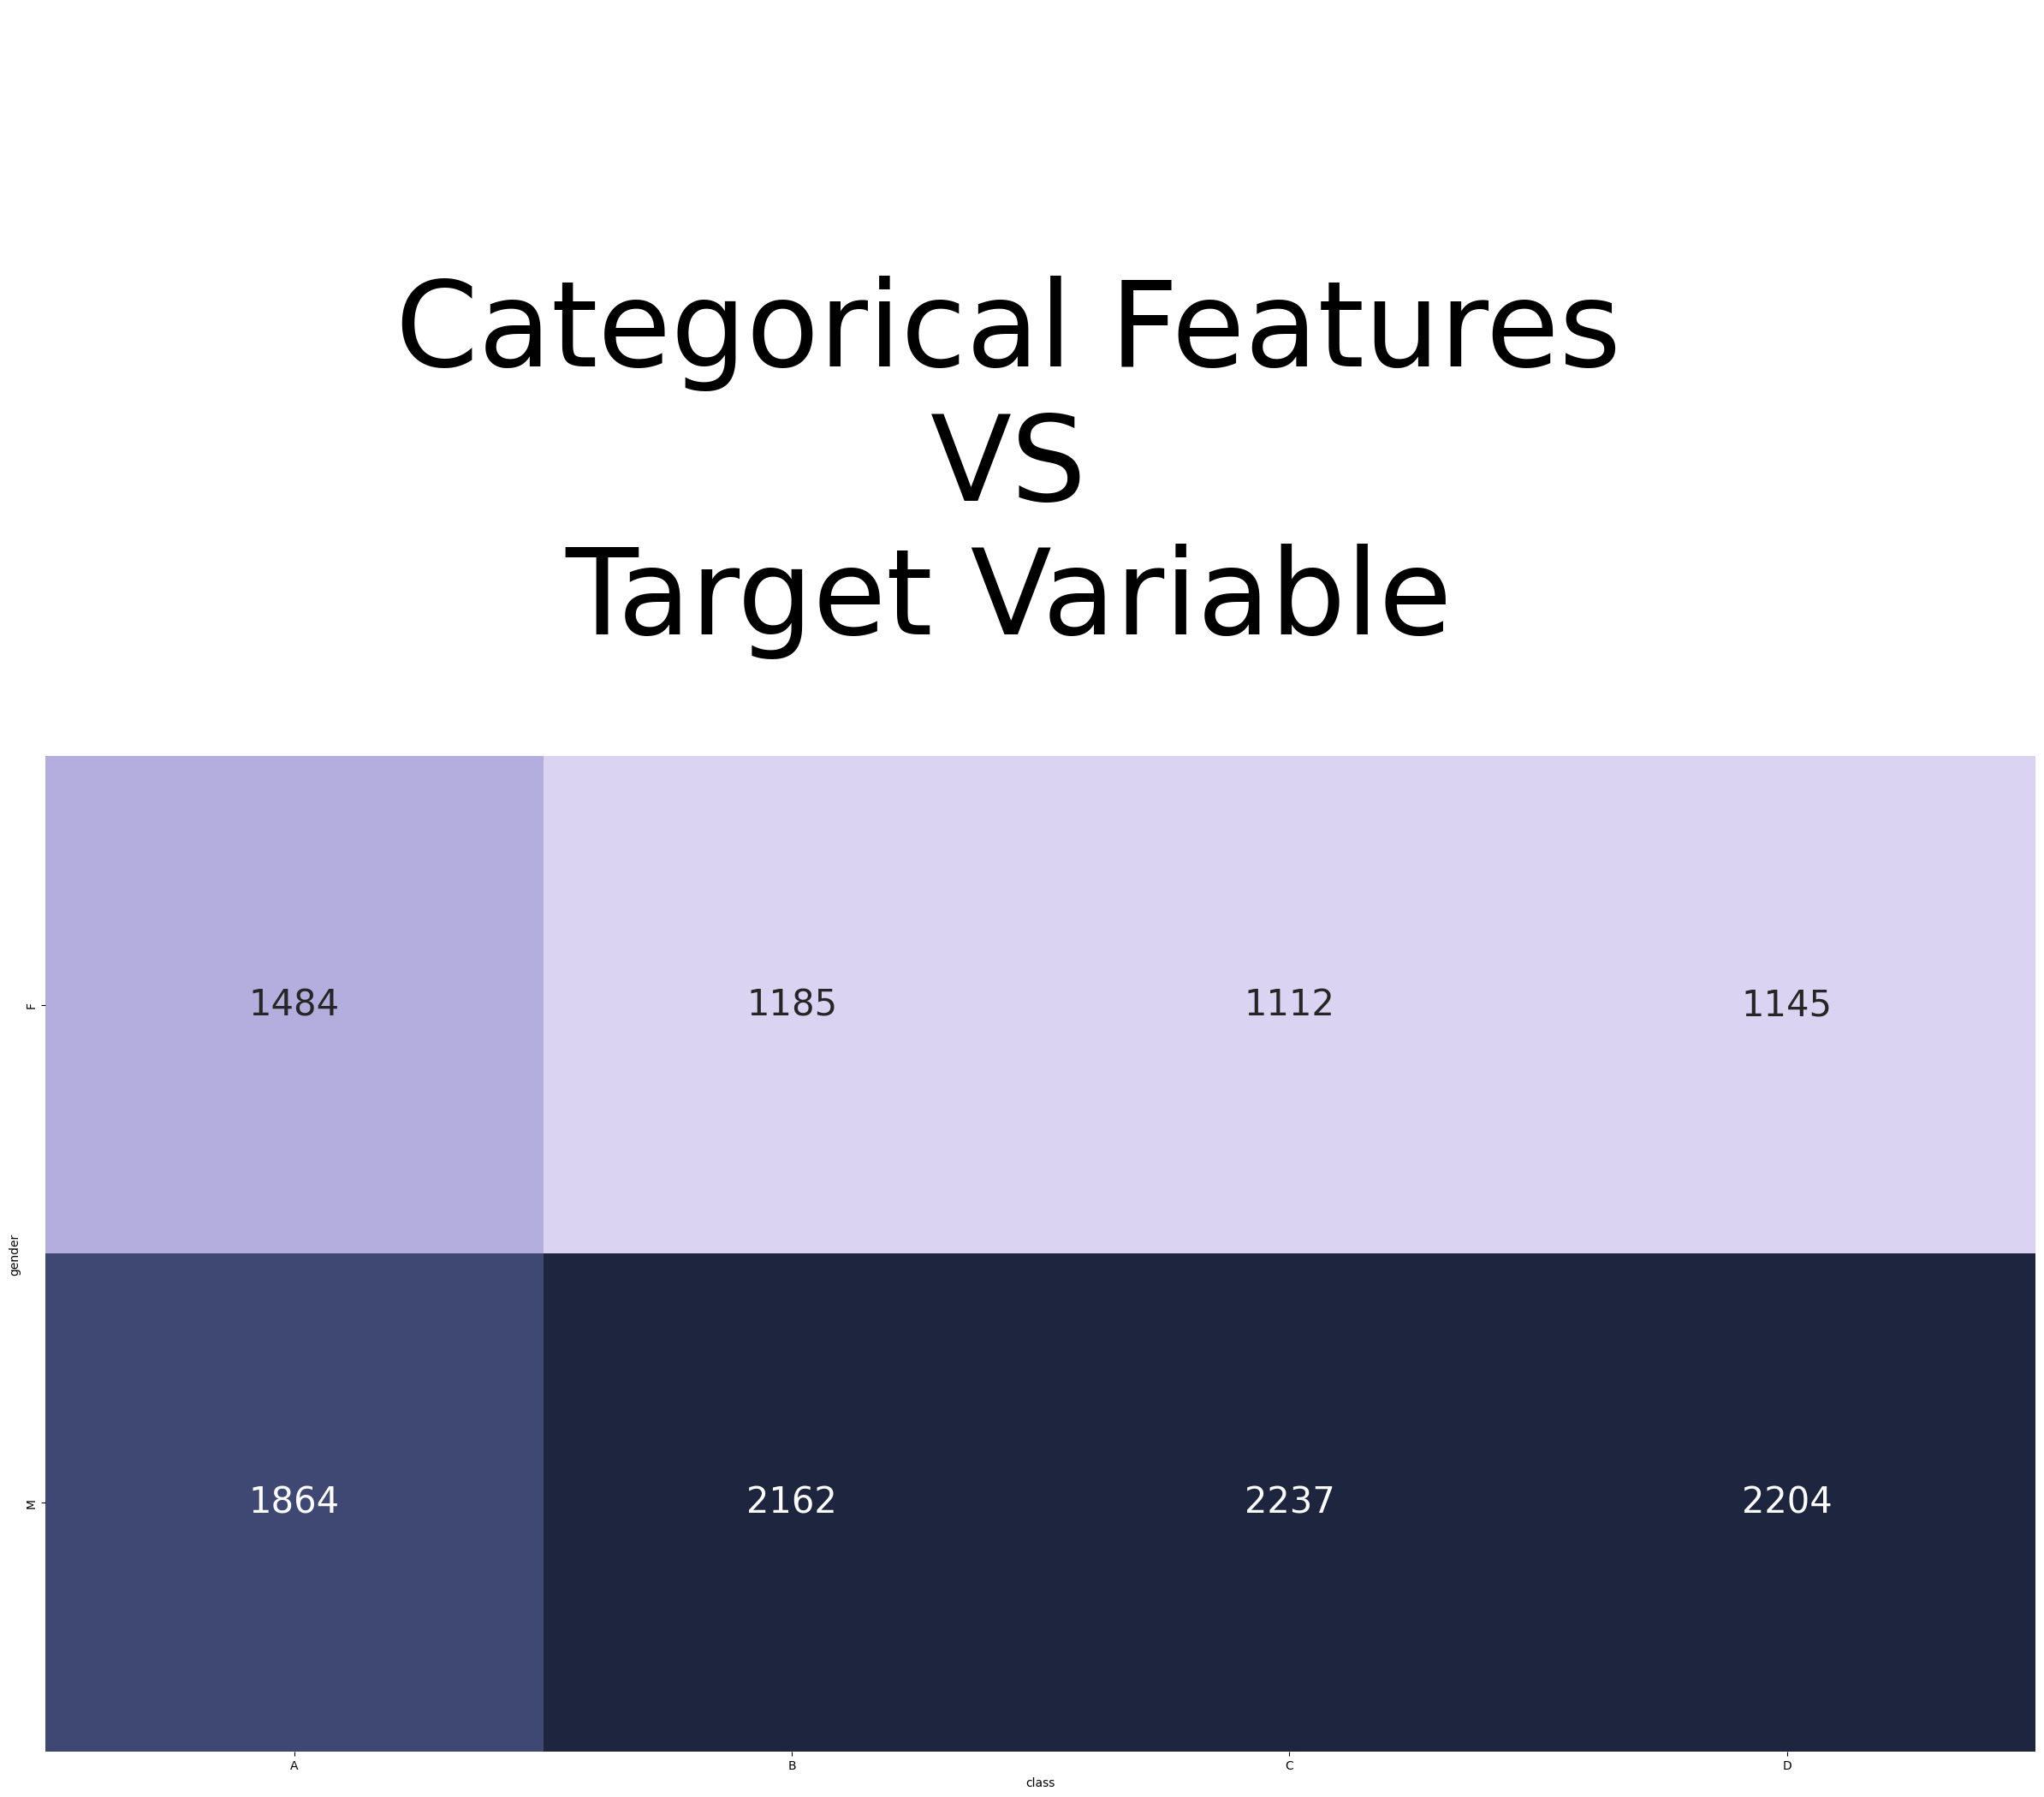

In [103]:
#類別型變數與應變數
n_rows, n_cols = (1,1)

#圖表大小
figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(30, 30))
figure.suptitle('\n\nCategorical Features\nVS\nTarget Variable', fontsize=100)

#走訪每一個欄位
for index, column in enumerate(categoricals):
    
    #i,j = (index // n_cols), (index % n_cols)
    
    #繪製熱力圖
    sns.heatmap(pd.crosstab(data[column],data['class']),
                #ax=axes[i,j],
                cmap=sns.cubehelix_palette(start=2.8, rot=.1),
                square='True',
                cbar=False,
                annot=True,
                annot_kws={'fontsize':30},
                fmt='d')
        
   # axes[i,j].set_xlabel("class", fontsize=90)

    #axes[i,j].set_ylabel(column,fontsize=90)
    
    #axes[i,j].set_yticklabels(axes[i,j].get_yticklabels(),fontsize=50)
    
    #axes[i,j].set_xticklabels(["A","B","C","D"],fontsize=50)

plt.show()

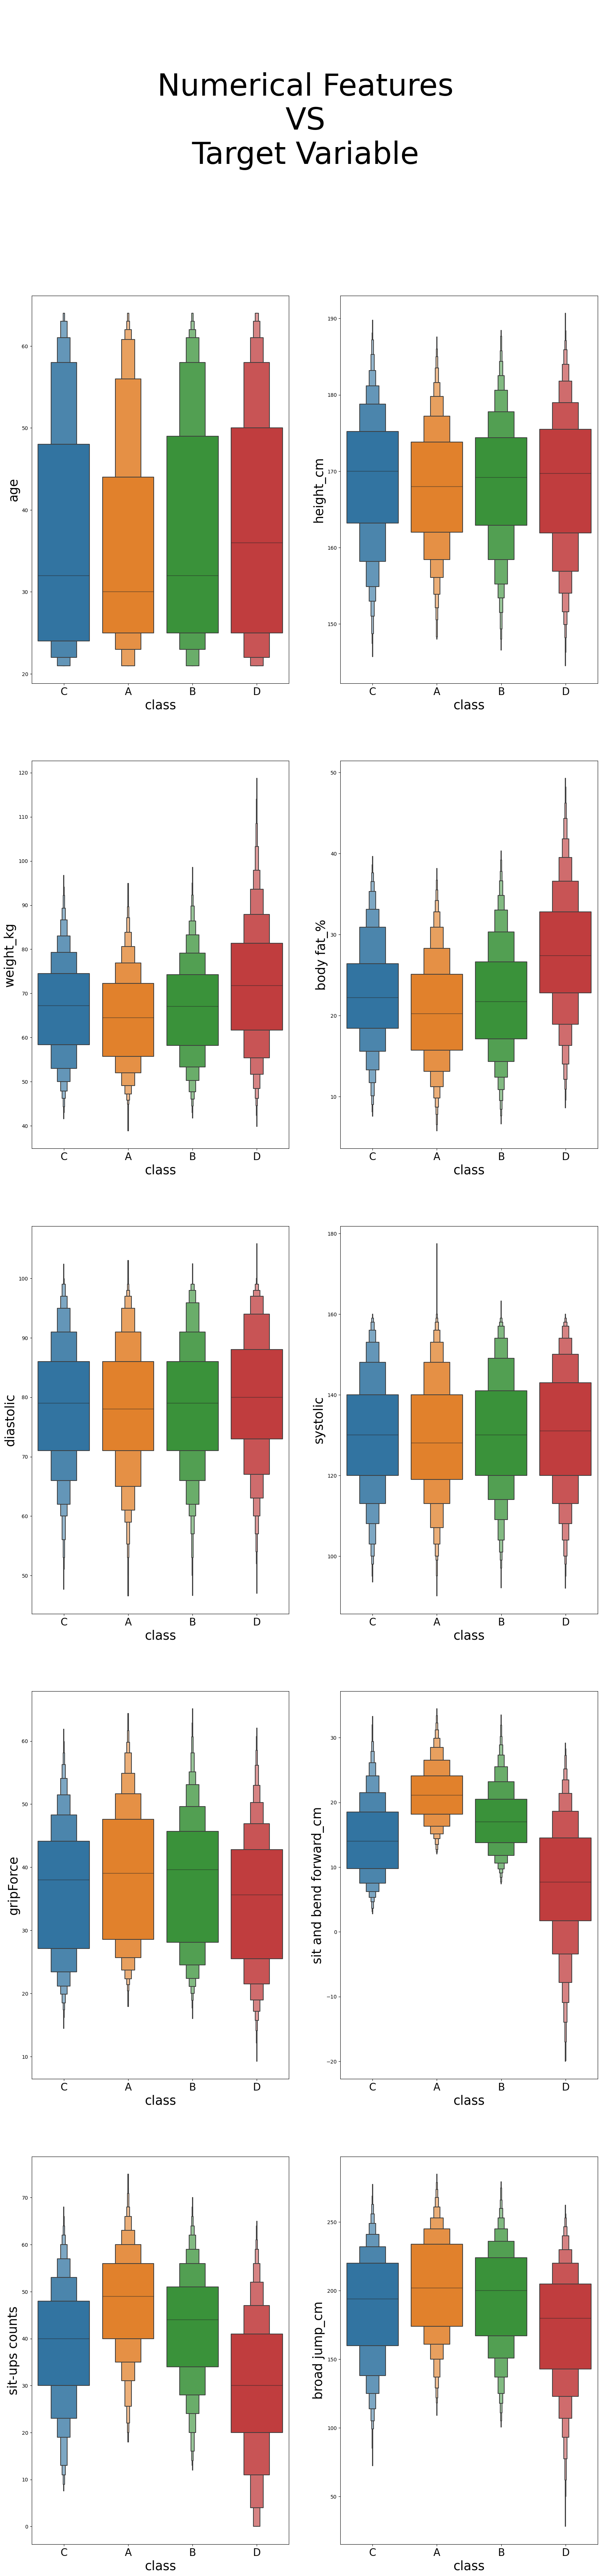

In [102]:
#連續型變數與應變數
n_rows, n_cols = (5,2)

#圖表大小
figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 80))
figure.suptitle('\n\nNumerical Features\nVS\nTarget Variable', fontsize=60)

#走訪每一個欄位
for index, column in enumerate(numeric):
    
    i,j = (index // n_cols), (index % n_cols)
    
    #繪製盒鬚圖
    bp=sns.boxenplot(y=column, x='class', data=data, ax=axes[i,j], showfliers=False)
        
    axes[i,j].set_xlabel(axes[i,j].get_xlabel(),fontsize=25)

    axes[i,j].set_ylabel(column,fontsize=25)
    
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(),fontsize=20)

plt.show()

In [ ]:
進行 Kmeans
目的:針對該人群的體適能數據做分群

In [112]:
#準備資料
a=dummydata.drop("class: A",axis=list('1000'),inplace=False)
b=dummydata.drop("class: B",axis=list('0100'),inplace=False)
c=dummydata.drop("class: C",axis=list('0010'),inplace=False)
d=dummydata.drop("class: D",axis=list('0001'),inplace=False)


print("資料筆數:",len(a))
print("欄位數量:",len(a.columns))

TypeError: unhashable type: 'list'